In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

In [2]:
btc_day = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_day.csv")
btc_day.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
0  2020-04-10  BTCUSD  7315.25  7315.25  7315.25  7315.25        0.00   
1  2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2  2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3  2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4  2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   

    Volume USD  
0         0.00  
1  16310014.53  
2  18138080.27  
3  17047120.32  
4  26533750.17

In [3]:
btc_min = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1min.csv")
btc_min.head()

Unix Timestamp                 Date  Symbol     Open     High      Low  \
0   1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60  7348.47   
1   1586390340000  2020-04-08 23:59:00  BTCUSD  7364.37  7369.60  7364.37   
2   1586390280000  2020-04-08 23:58:00  BTCUSD  7360.89  7367.18  7360.89   
3   1586390220000  2020-04-08 23:57:00  BTCUSD  7357.62  7366.12  7357.62   
4   1586390160000  2020-04-08 23:56:00  BTCUSD  7370.71  7370.71  7357.62   

     Close    Volume  
0  7350.41  7.733528  
1  7369.60  1.310954  
2  7364.37  1.018774  
3  7360.89  0.026251  
4  7357.62  0.444867

In [4]:
btc_hr = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1hr.csv")
btc_hr.head()

Unix Timestamp                 Date  Symbol     Open     High      Low  \
0   1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60  7338.23   
1   1586386800000  2020-04-08 23:00:00  BTCUSD  7367.28  7398.92  7348.47   
2   1586383200000  2020-04-08 22:00:00  BTCUSD  7337.19  7390.25  7322.87   
3   1586379600000  2020-04-08 21:00:00  BTCUSD  7327.70  7370.00  7311.33   
4   1586376000000  2020-04-08 20:00:00  BTCUSD  7320.11  7375.72  7313.66   

     Close      Volume  
0  7338.23    7.788915  
1  7369.60   66.558293  
2  7367.28   88.486108  
3  7337.19   35.551553  
4  7327.70  153.655811

In [5]:
print('Shape of btc_hr dataset is: ',btc_hr.shape)
print('Shape of btc_min dataset is: ',btc_min.shape)
print('Shape of btc_day dataset is: ',btc_day.shape)

Shape of btc_hr dataset is:  (39465, 8)
Shape of btc_min dataset is:  (2283519, 8)
Shape of btc_day dataset is:  (1647, 8)


In [6]:
btc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1647 non-null   object 
 1   Symbol      1647 non-null   object 
 2   Open        1647 non-null   float64
 3   High        1647 non-null   float64
 4   Low         1647 non-null   float64
 5   Close       1647 non-null   float64
 6   Volume BTC  1647 non-null   float64
 7   Volume USD  1647 non-null   float64
dtypes: float64(6), object(2)
memory usage: 103.1+ KB


In [7]:
btc_day['Date'] = pd.to_datetime(btc_day['Date'])

In [8]:
btc_day.isnull().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [9]:
btc_day.describe()

Open          High           Low         Close    Volume BTC  \
count   1647.000000   1647.000000   1647.000000   1647.000000   1647.000000   
mean    4823.493224   4971.083673   4656.335337   4827.596515   3789.357365   
std     3937.740533   4078.527350   3760.335160   3936.503969   4436.695998   
min      242.500000    245.000000    236.000000    243.950000      0.000000   
25%      741.975000    751.830000    732.030000    742.260000   1028.940000   
50%     4147.100000   4295.090000   4000.000000   4154.840000   2263.370000   
75%     7920.510000   8139.750000   7630.445000   7920.510000   4918.785000   
max    19499.990000  19999.000000  18870.000000  19499.990000  49229.150000   

         Volume USD  
count  1.647000e+03  
mean   2.129125e+07  
std    3.694968e+07  
min    0.000000e+00  
25%    1.659287e+06  
50%    9.395394e+06  
75%    2.464551e+07  
max    5.606539e+08

In [10]:
print(min(btc_day['Date']),"||||",max(btc_day['Date']))

2015-10-08 00:00:00 |||| 2020-04-10 00:00:00


In [11]:
btc_day_copy = btc_day.copy()
btc_day_copy.drop(btc_day_copy[btc_day_copy['Volume BTC'] == 0].index, inplace = True)
btc_day_copy.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
1 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
5 2020-04-05  BTCUSD  6870.20  6907.90  6678.60  6775.21     1275.49   

    Volume USD  
1  16310014.53  
2  18138080.27  
3  17047120.32  
4  26533750.17  
5   8662210.80

In [12]:
btc_day_copy.shape

(1643, 8)

In [13]:
#creating return series
btc_day_copy['Return'] = btc_day_copy['Close'].pct_change()

In [14]:
btc_day_copy.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
1 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
5 2020-04-05  BTCUSD  6870.20  6907.90  6678.60  6775.21     1275.49   

    Volume USD    Return  
1  16310014.53       NaN  
2  18138080.27  0.007430  
3  17047120.32 -0.022768  
4  26533750.17  0.018766  
5   8662210.80 -0.076564

In [15]:
np.mean(btc_day_copy['Return'])

-0.0011739233132494799

# Visualization

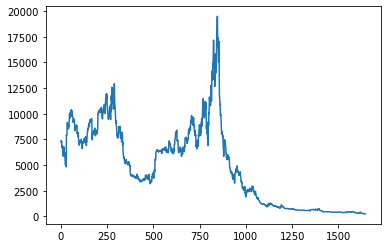

In [16]:
#plotting closing prices
ax1 = btc_day_copy['Close'].plot(style = ['-'])

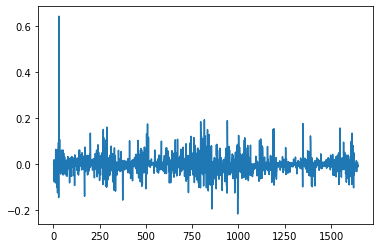

In [17]:
ax2 = btc_day_copy['Return'].plot(style = ['-'])

<AxesSubplot:>

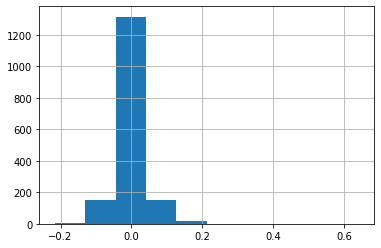

In [18]:
btc_day_copy['Return'].hist()

<AxesSubplot:>

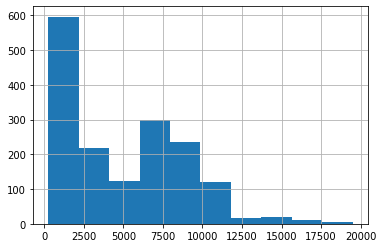

In [19]:
btc_day_copy['Close'].hist()

<AxesSubplot:ylabel='Density'>

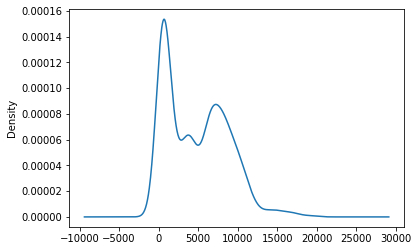

In [20]:
#kernel density
btc_day_copy['Close'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

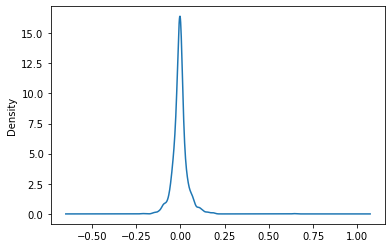

In [21]:
btc_day_copy['Return'].plot(kind='kde')

C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:>

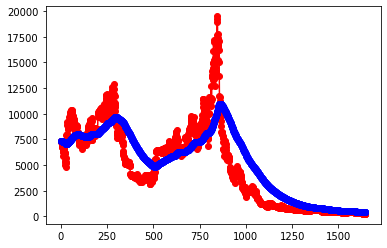

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(btc_day_copy['Close']).fit(smoothing_level=.01, optimized=False)
btc_day_copy['Close'].plot(marker = 'o', color='red')
model.fittedvalues.plot(marker = 'o', color = 'blue')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

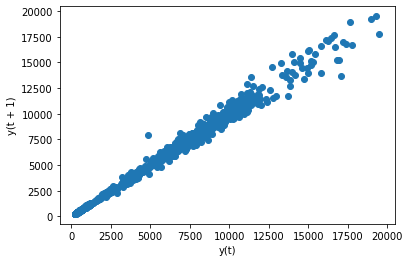

In [23]:
from pandas.plotting import lag_plot
lag_plot(btc_day_copy['Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

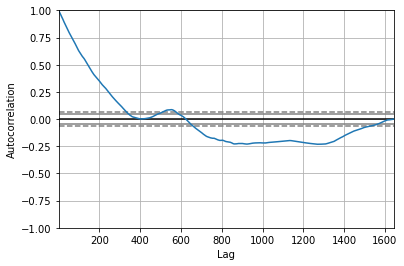

In [24]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(btc_day_copy['Close'])

In [28]:
btc_day_copy.head(20)

Date  Symbol     Open     High      Low    Close  Volume BTC  \
1  2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2  2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3  2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4  2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
5  2020-04-05  BTCUSD  6870.20  6907.90  6678.60  6775.21     1275.49   
6  2020-04-04  BTCUSD  6740.88  7016.00  6658.68  6870.20     1671.20   
7  2020-04-03  BTCUSD  6801.00  7048.72  6609.47  6740.88     2881.24   
8  2020-04-02  BTCUSD  6666.16  7273.00  6579.69  6801.00     5345.30   
9  2020-04-01  BTCUSD  6428.54  6714.76  6156.47  6666.16     2759.23   
10 2020-03-31  BTCUSD  6406.91  6530.83  6341.25  6428.54     1459.01   
11 2020-03-30  BTCUSD  5882.70  6629.18  5857.41  6406.91     3108.10   
12 2020-03-29  BTCUSD  6258.01  6283.41  5873.93  5882.70     1827.65   
13 2020-03-28  BTCUSD  6378.40  6378.40  6038.09  6258.01     2087.45   
14 2020-03-27  BTCUSD  6728.44  6869.50  6268.50  6378.40     2571.11   
15 2020-03-26  BTCUSD  6694.73  6793.19  6530.01  6728.44     2182.88   
16 2020-03-25  BTCUSD  6775.57  6977.69  6471.08  6694.73     4931.72   
17 2020-03-24  BTCUSD  6500.00  6866.70  6405.00  6775.57     6957.49   
18 2020-03-23  BTCUSD  5839.44  6650.00  5689.92  6500.00     8255.20   
19 2020-03-22  BTCUSD  6208.45  6416.50  5748.14  5839.44     4005.85   
20 2020-03-21  BTCUSD  6205.18  6464.21  5863.67  6208.45     3239.75   

     Volume USD    Return  
1   16310014.53       NaN  
2   18138080.27  0.007430  
3   17047120.32 -0.022768  
4   26533750.17  0.018766  
5    8662210.80 -0.076564  
6   11383223.34  0.014020  
7   19692803.68 -0.018823  
8   36577028.28  0.008919  
9   17697565.17 -0.019826  
10   9418155.00 -0.035646  
11  19612581.42 -0.003365  
12  11038076.30 -0.081819  
13  12958586.63  0.063799  
14  17079624.31  0.019238  
15  14548179.67  0.054879  
16  32952771.61 -0.005010  
17  46293922.63  0.012075  
18  51170869.57 -0.040671  
19  24126014.49 -0.101625  
20  19987972.41  0.063193